In [71]:
import pandas as pd
import numpy as np
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("dataset/metadata.json", lines=True)

In [13]:
def get_path_to_file(index):
    return "dataset/" + str(df.loc[index]["location"])

In [14]:
get_path_to_file(0)

'dataset/data_aug2/-0SdAVK79lg_1.wav'

16000
[-0.12039185 -0.17340088 -0.199646   ... -0.13357544 -0.12319946
 -0.06369019]
160000


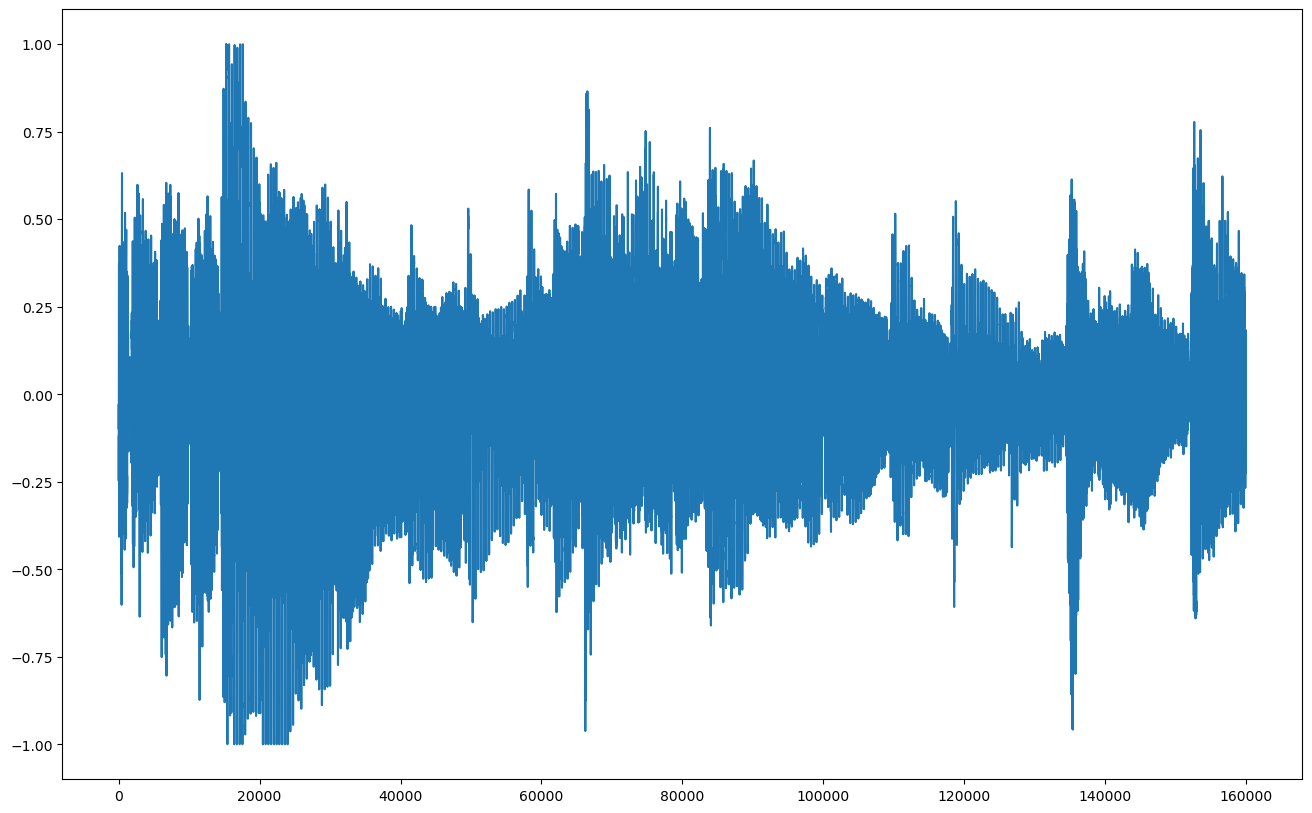

In [80]:
samplerate, data = wavfile.read(get_path_to_file(0))
print(samplerate)
print(data)
print(len(data))

plt.figure(figsize=(16, 10))
plt.plot(data)


[-3.0073547e+00+0.j          7.0103419e-01+0.07281258j
  2.8897002e+00+2.4487927j  ... -1.0592937e-03+0.08731341j
  9.7509027e-02+0.06756017j  1.3278198e-01+0.j        ]
[0.0000e+00 1.0000e-01 2.0000e-01 ... 7.9998e+03 7.9999e+03 8.0000e+03]
80001


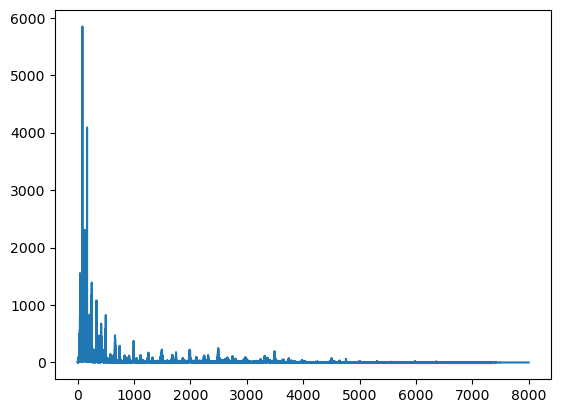

In [81]:
num_samples = len(data)

yf = rfft(data)
xf = rfftfreq(num_samples, 1 / samplerate)
print(yf)
print(xf)
print(len(xf))

plt.plot(xf, np.abs(yf))

In [82]:
# First Pass: Determine longest array size
longest = 0
locations = df["location"].to_numpy()
samplerates = set()
for loc in locations:
    path = "dataset/" + loc
    samplerate, data = wavfile.read(path)
    length = len(data)
    samplerates.add(samplerate)
    if length > longest:
        longest = length

print(samplerates)
print(longest)
    

{16000}
160000


In [87]:
# Second Pass: Pad with 0s

samplerate, data = wavfile.read(get_path_to_file(0))
og_length = len(data)
pad = longest - og_length
zeros = np.zeros(pad)
new_data = np.concatenate((data, zeros))
num_samples = len(new_data)
yf1 = rfft(new_data)
xf1 = rfftfreq(num_samples, 1 / samplerate)


samplerate, data = wavfile.read(get_path_to_file(1))
og_length = len(data)
pad = longest - og_length
zeros = np.zeros(pad)
new_data = np.concatenate((data, zeros))
num_samples = len(new_data)
yf2 = rfft(new_data)
xf2 = rfftfreq(num_samples, 1 / samplerate)


print(np.array_equal(xf1, xf2))
print(np.array_equal(yf1, yf2))
print(len(yf2))
print(len(xf2))


True
False
80001
80001


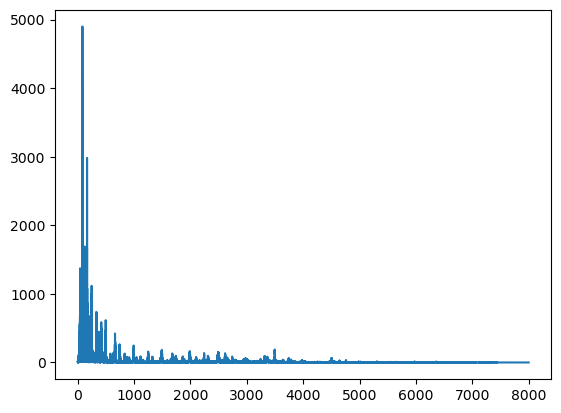

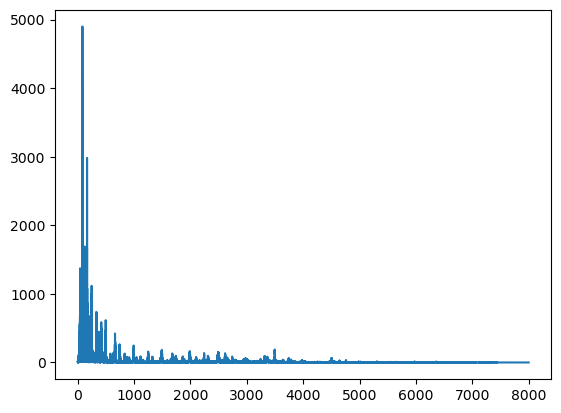

In [92]:
samplerate, data = wavfile.read(get_path_to_file(1))
og_length = len(data)
pad = longest - og_length
zeros = np.zeros(pad)
new_data = np.concatenate((zeros, data))
num_samples = len(new_data)
yf1 = rfft(new_data)
xf1 = rfftfreq(num_samples, 1 / samplerate)


samplerate, data = wavfile.read(get_path_to_file(1))
og_length = len(data)
pad = longest - og_length
zeros = np.zeros(pad)
new_data = np.concatenate((data, zeros))
num_samples = len(new_data)
yf2 = rfft(new_data)
xf2 = rfftfreq(num_samples, 1 / samplerate)


plt.plot(xf1, np.abs(yf2))
plt.figure(2)
plt.plot(xf1, np.abs(yf2))